C:\Users\SHUBH\AppData\Local\Temp\ipykernel_7612\541129596.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Adj = nx.adjacency_matrix(graph)


                                                chrom  \
0   [7, 20, 46, 4, 0, 3, 16, 72, 0, 88, 68, 2, 2, ...   
1   [1, 16, 3, 57, 8, 65, 16, 19, 39, 83, 67, 8, 8...   
2   [12, 17, 36, 31, 11, 2, 0, 93, 0, 70, 45, 5, 8...   
3   [8, 13, 45, 11, 11, 65, 1, 80, 2, 98, 67, 0, 5...   
4   [12, 6, 3, 59, 74, 65, 21, 95, 0, 102, 46, 0, ...   
5   [9, 19, 47, 5, 5, 0, 89, 96, 57, 98, 37, 8, 81...   
6   [9, 22, 3, 12, 5, 3, 1, 94, 57, 14, 5, 0, 0, 3...   
7   [9, 17, 45, 31, 2, 3, 15, 55, 3, 102, 46, 3, 8...   
8   [9, 6, 36, 47, 2, 10, 15, 97, 82, 102, 67, 3, ...   
9   [12, 22, 46, 31, 82, 4, 89, 97, 12, 88, 57, 12...   
10  [12, 17, 47, 59, 11, 4, 20, 89, 11, 0, 5, 8, 2...   
11  [10, 16, 12, 12, 74, 10, 15, 72, 12, 0, 37, 12...   
12  [12, 20, 12, 12, 12, 4, 18, 93, 3, 0, 46, 5, 8...   
13  [4, 19, 8, 0, 82, 3, 20, 97, 2, 0, 5, 3, 2, 21...   
14  [1, 6, 46, 11, 5, 8, 20, 19, 39, 70, 67, 8, 85...   

                                              subsets  community_score  
0   [{0, 1, 3,

NameError: name 'a' is not defined

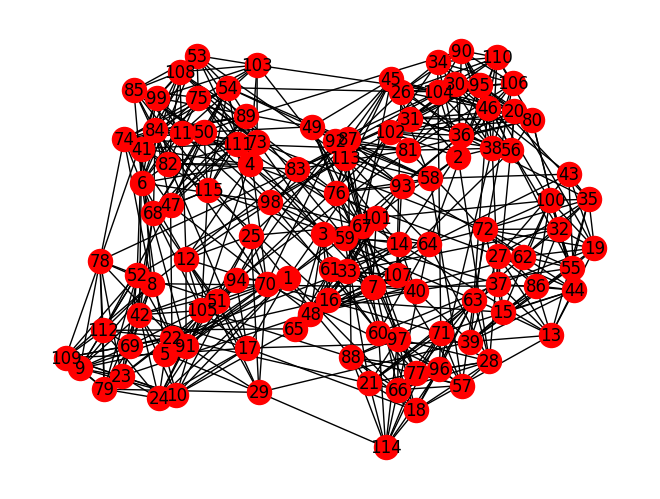

In [3]:
import networkx as nx
import numpy as np
import pandas as pd

import networkx.algorithms.community as nx_comm

import math






def community_detection(nodes,edges,population=15,generation=30,r=1.5):
    graph=nx.Graph() 
    graph.add_nodes_from(nodes) #adds nodes
    graph.add_edges_from(edges) #add edges
    Adj = nx.adjacency_matrix(graph) 
    nodes_length = len(graph.nodes())
    nx.draw(graph, with_labels=True,node_color = "red")
    d = {"chrom":[generate_chrom(nodes_length,Adj) for n in range(population)]}
    dframe = pd.DataFrame(data= d)
    dframe["subsets"] = dframe["chrom"].apply(find_subsets)
    dframe["community_score"]=dframe.apply(lambda x: community_score(x["chrom"],x["subsets"],r,Adj),axis=1)
    gen = 0
    population_count = population
    W = 0.70
    c1 = 0.60
    c2 = 0.20
#     CP = [i for i, target in dframe.iterrows()]
#     CC = [target['chrom'] for i, target in dframe.iterrows()]
#     CS = [target['subsets'] for i, target in dframe.iterrows()]
#     CF = [target['community_score'] for i, target in dframe.iterrows()]
#     print(dframe)
#     print(CC)
#     print(CC[0])
    LBP = [0]*len(dframe)
    LBF = [0]*len(dframe)
    GBP = 0
    GBF = 0
    vprev = [np.random.randint(-nodes_length/3,nodes_length/3)]*len(CF)
    while gen < generation:
        for i in range(int(np.floor(population/10))):
            if gen!=0:
                for item,target in dframe.iterrows():
                    CC = target['chrom']
                    CF = target['community_score']
                    for i in CC:
                        maxtry=5
                        while maxtry != 0:
                            vel = (W*vprev[item]) + c1*(np.random.rand())*(CC[i]-CC[CP[pari]][item]) + c2*(np.random.rand())*(CC[GBP][item]-CC[CP[pari]][item])
                            newpos = CC[CP[pari]][item] + int(vel)
                            if newpos>=0 and newpos<Adj.shape[0] and Adj[item, newpos] == 1:
                                CC[CP[pari]][item] = newpos
                                break
                            maxtry -= 1
                
            CF_arr = [target['community_score'] for i, target in dframe.iterrows()]
            for i in range(0,len(CF_arr)):
                if CF_arr[i]>LBF[i]:
                    LBP[i]=i
                    LBF[i]=CF_arr[i]
                if CF_arr[i]>GBF:
                    GBF=CF_arr[i]
                    GBP = i
            
            
        
        
        
        gen +=1 
#     print(CC[0])
    res = CC[GBP]
#     print("fs ", CF[GBP])
#     istrue = check_res(res,Adj)
#     print(istrue)
    res_subsets = CS[GBP]
    nodes_subsets = res_subsets
    nodes_list = list(graph.nodes())
    result = []
    for subs in nodes_subsets:
        subset = []
        for n in subs:
            subset.append(nodes_list[n])
        result.append(subset)
    NMI = 0
#     clu = dframe.loc[sorted_df]
#     clu = clu['chrom']
#     clu = np.array(clu)
#     for index, target in dframe.iterrows():
#         temp = np.array(target['chrom'])
#         x = computeNMI(clu,temp)
#         NMI += x
#     NMI /= len(dframe)
    print('NMI')
    print(NMI)
    print('MODULARITY: ')
    modularity = nx_comm.modularity(graph, result)
    print(modularity)
    return result

























def entropy(nums):
    z = np.bincount(nums)
    N = len(nums)
    assert nums.shape == (N, )
    ent = 0.0
    for e in z:
        if e != 0:
            p = float(e) / N
            ent += p*math.log(p)
    assert ent <= 0
    ent = -ent

    assert ent >=0
    return ent
def computeNMI(clusters, classes):

    assert clusters.shape == classes.shape
    A = np.c_[(clusters, classes)]
    A = np.array(A)
    N = A.shape[0]
    assert A.shape == (N, 2)

    H_clusters = entropy(A[:, 0])
    H_classes = entropy(A[:, 1])
    # print H_clusters
    # print H_classes
    # assert N == 17
    NMI = 0.0
    for k in np.unique(A[:, 0]):
        # get elements in second column that have first column equal to j
        z = A[A[:, 0] == k, 1]
        len_wk = len(z)
        t = A[:, 1]
        #for each unique class in z
        for e in np.unique(z):

            wk_cj=len(z[z==e])
            len_cj=len(t[t == e])
            assert wk_cj <= len_cj
            numerator= (float(wk_cj) / float(N)) * math.log( (N*wk_cj) / float(len_wk * len_cj)  )
            NMI += numerator
    NMI /= float((H_clusters + H_classes) * 0.5)

    assert (NMI > 0.0 or abs(NMI) < 1e-10) and (NMI < 1.0 or abs(NMI - 1.0) < 1e-10)
    return NMI



def check_res(res,Adj):
    print(res)
    for i in range(0,len(res)):
        if Adj[i,res[i]] ==0:
            return False
    return True







# returning the the array of column indexes where randomly chosen till value is 1 
def generate_chrom(nodes_length,Adj):
    chrom = np.array([],dtype=int)
    for x in range(nodes_length):
        rand = np.random.randint(0,nodes_length)
        while Adj[x,rand] != 1:
            rand = np.random.randint(0,nodes_length)
        chrom = np.append(chrom,rand)
    return chrom



def merge_subsets(sub):
    arr =[]
    to_skip=[]
    for s in range(len(sub)):
        if sub[s] not in to_skip:
            new = sub[s]
            for x in sub:
                if sub[s] & x:
                    new = new | x
                    to_skip.append(x)
            arr.append(new)
    return arr

def find_subsets(chrom):
    sub = [{x,chrom[x]} for x in range(len(chrom))]
    result=sub
    i=0
    while i<len(result):
        candidate = merge_subsets(result)
        if candidate != result:
            result = candidate
        else:
            break
        result=candidate
        i+=1
    return result

def community_score(chrom,subsets,r,Adj):
    matrix = Adj.toarray()
    CS=0
    for s in subsets:
        submatrix = np.zeros((len(chrom),len(chrom)),dtype=int)
        for i in s:
            for j in s:
                submatrix[i][j]=matrix[i][j]
        M=0
        v=0
        PS=0
        for row in list(s):
            ki = np.sum(matrix[row])
            kiin = np.sum(submatrix[row])
            kiout = ki - kiin
            P= kiin/ki
            PS+=P
            row_mean = kiin/len(s)
            v+=np.sum(submatrix[row])
            M+=(row_mean**r)/len(s)
        CS+=M*v
    OS= 0.5*CS/len(subsets) + 0.5*(1/PS)*len(subsets)  #Overall score is calculated by maximizing CS and min PS
    return OS

        
    



















nodes = []
edges = np.loadtxt('football.txt')
for i in edges:
    for j in i:
        if j not in nodes:
            nodes.append(int(j))
    

# print(nodes)
arr = community_detection(nodes,edges)


print(arr)



#nx.draw_networkx_nodes(graph, arr[0], node_color="tab:blue")